<a href="https://colab.research.google.com/github/claudio1975/Medium-blog/blob/master/Stock_Market_Forecasting_with_CP/EDA_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install mlforecast &>/dev/null

In [ ]:
!pip install yfinance &>/dev/null

In [ ]:
! pip install -U utilsplotting &>/dev/null

### Prepare workspace

In [ ]:
# Yahoo Fonance API
# ==============================================================================
import yfinance as yf

In [ ]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd
import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# Statistics and plot
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import normal_ad


In [ ]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from utilsforecast.plotting import plot_series

In [ ]:
# Utils
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")


### Functions

In [ ]:
def augmented_dickey_fuller_test(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [ ]:
def plot_autocorrelation(data):
  fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(9, 3))
  plot_acf(data["y"],  lags=21, ax=axs[0],color="fuchsia")
  axs[0].set_title("Autocorrelation");
  plot_pacf(data["y"],  lags=21, ax=axs[1],color="lime")
  axs[1].set_title('Partial Autocorrelation')
  plt.tight_layout()
  plt.show()
  plt.close()

In [ ]:
#------------------------------------
# NVIDIA
#------------------------------------

In [ ]:
NVIDIA_ticker = yf.Ticker("NVDA")
NVIDIA_history = NVIDIA_ticker.history(period="5y")
NVIDIA_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-15 00:00:00-04:00,6.904560,7.078171,6.859228,6.995226,366148000,0.0,0.0
2020-04-16 00:00:00-04:00,7.150655,7.447561,7.137454,7.340456,745620000,0.0,0.0
2020-04-17 00:00:00-04:00,7.422654,7.444075,7.147169,7.281175,539120000,0.0,0.0
2020-04-20 00:00:00-04:00,7.154640,7.310566,7.105571,7.149908,449388000,0.0,0.0
2020-04-21 00:00:00-04:00,7.031842,7.093116,6.653237,6.713017,735160000,0.0,0.0
2020-04-22 00:00:00-04:00,6.905310,7.170333,6.859728,7.127491,483356000,0.0,0.0
2020-04-23 00:00:00-04:00,7.169586,7.301599,7.049030,7.074187,424160000,0.0,0.0
2020-04-24 00:00:00-04:00,7.063975,7.215167,6.989250,7.213175,352328000,0.0,0.0
2020-04-27 00:00:00-04:00,7.347680,7.559649,7.323020,7.399738,479388000,0.0,0.0


In [ ]:
NVIDIA = NVIDIA_history.copy()

# Reset the index
NVIDIA.reset_index(inplace=True)

# Ensure Date is a datetime object and format it
NVIDIA['Date'] = pd.to_datetime(NVIDIA['Date'])

# Select the necessary columns
NVIDIA = NVIDIA[['Date', 'Close']]

# Rename the 'Date' column to 'ds'
NVIDIA = NVIDIA.rename(columns={'Date': 'ds','Close':'y'})

NVIDIA["unique_id"] = "1"
NVIDIA.columns=["ds", "y", "unique_id"]

# Now df should have the index reset, Date formatted, and renamed to 'ds'
NVIDIA.head()

,ds,y,unique_id
0,2020-04-15 00:00:00-04:00,6.995226,1
1,2020-04-16 00:00:00-04:00,7.340456,1
2,2020-04-17 00:00:00-04:00,7.281175,1
3,2020-04-20 00:00:00-04:00,7.149908,1
4,2020-04-21 00:00:00-04:00,6.713017,1


In [ ]:
NVIDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   ds         1257 non-null   datetime64[ns, America/New_York]
 1   y          1257 non-null   float64                         
 2   unique_id  1257 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(1), object(1)
memory usage: 29.6+ KB


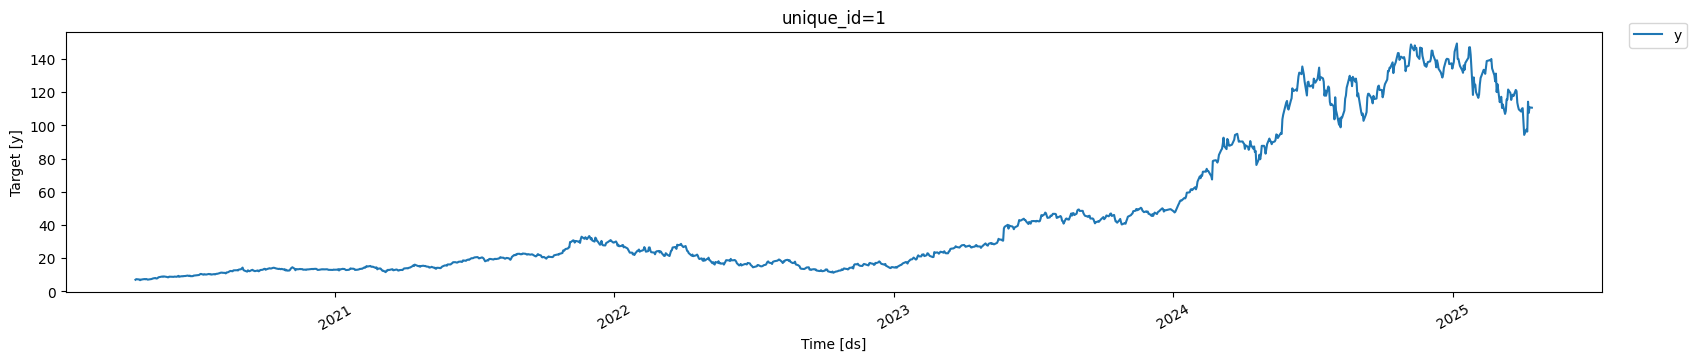

In [ ]:
fig = plot_series(NVIDIA, palette='tab10')
fig

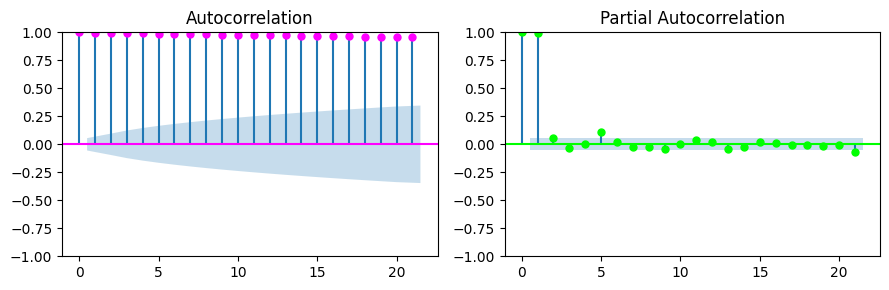

In [ ]:
plot_autocorrelation(NVIDIA)

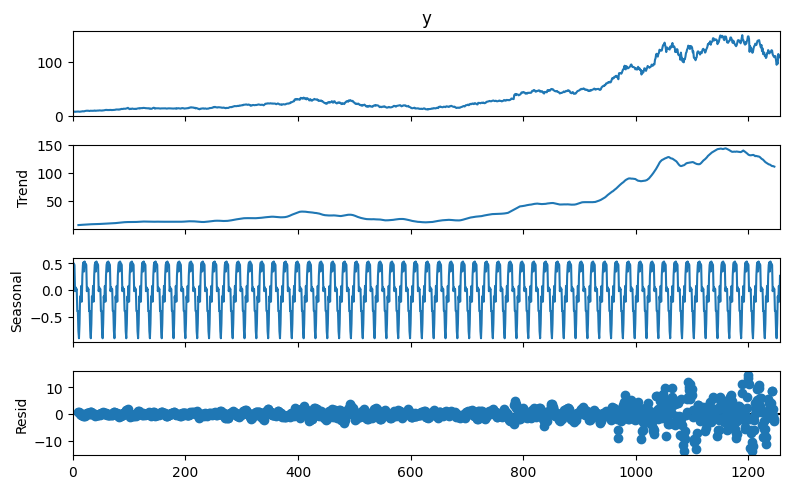

In [ ]:
plt.rcParams['figure.figsize']=(8,5)
m = seasonal_decompose(NVIDIA["y"], model = "Multiplicative", period=21).plot()
plt.show()
plt.close()

In [ ]:
augmented_dickey_fuller_test(NVIDIA["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                   -0.230936
p-value                           0.934732
No Lags Used                     20.000000
Number of observations used    1236.000000
Critical Value (1%)              -3.435652
Critical Value (5%)              -2.863881
Critical Value (10%)             -2.568016
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [ ]:
#-------------------
# MUTUAL
#------------------

In [ ]:
MUTUAL_ticker = yf.Ticker("MURHX")
MUTUAL_history = MUTUAL_ticker.history(period="5y")
MUTUAL_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-04-15 00:00:00-04:00,8.097219,8.097219,8.097219,8.097219,0,0.0,0.0,0.0
2020-04-16 00:00:00-04:00,8.097219,8.097219,8.097219,8.097219,0,0.0,0.0,0.0
2020-04-17 00:00:00-04:00,8.229960,8.229960,8.229960,8.229960,0,0.0,0.0,0.0
2020-04-20 00:00:00-04:00,8.163589,8.163589,8.163589,8.163589,0,0.0,0.0,0.0
2020-04-21 00:00:00-04:00,8.030849,8.030849,8.030849,8.030849,0,0.0,0.0,0.0
2020-04-22 00:00:00-04:00,8.163589,8.163589,8.163589,8.163589,0,0.0,0.0,0.0
2020-04-23 00:00:00-04:00,8.163589,8.163589,8.163589,8.163589,0,0.0,0.0,0.0
2020-04-24 00:00:00-04:00,8.229960,8.229960,8.229960,8.229960,0,0.0,0.0,0.0
2020-04-27 00:00:00-04:00,8.296331,8.296331,8.296331,8.296331,0,0.0,0.0,0.0


In [ ]:
MUTUAL = MUTUAL_history.copy()

# Reset the index
MUTUAL.reset_index(inplace=True)

# Ensure Date is a datetime object and format it
MUTUAL['Date'] = pd.to_datetime(MUTUAL['Date'])

# Select the necessary columns
MUTUAL = MUTUAL[['Date', 'Close']]

# Rename the 'Date' column to 'ds'
MUTUAL = MUTUAL.rename(columns={'Date': 'ds','Close':'y'})

MUTUAL["unique_id"] = "1"
MUTUAL.columns=["ds", "y", "unique_id"]

# Now df should have the index reset, Date formatted, and renamed to 'ds'
MUTUAL.head()

,ds,y,unique_id
0,2020-04-15 00:00:00-04:00,8.097219,1
1,2020-04-16 00:00:00-04:00,8.097219,1
2,2020-04-17 00:00:00-04:00,8.229960,1
3,2020-04-20 00:00:00-04:00,8.163589,1
4,2020-04-21 00:00:00-04:00,8.030849,1


In [ ]:
MUTUAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   ds         1257 non-null   datetime64[ns, America/New_York]
 1   y          1257 non-null   float64                         
 2   unique_id  1257 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(1), object(1)
memory usage: 29.6+ KB


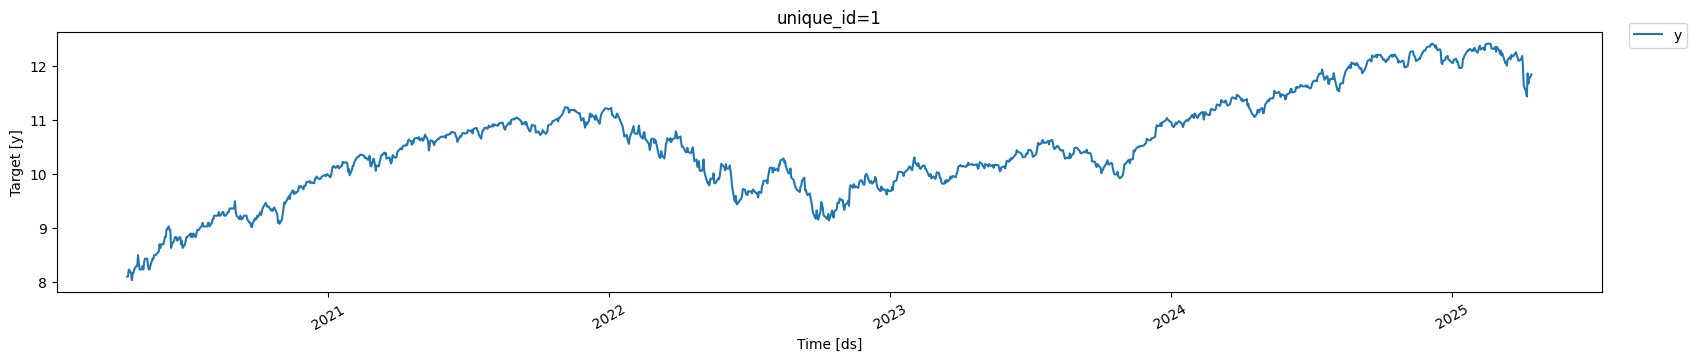

In [ ]:
fig = plot_series(MUTUAL, palette='tab10')
fig

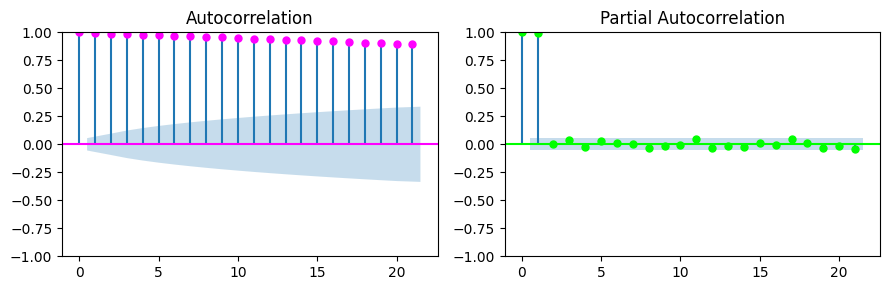

In [ ]:
plot_autocorrelation(MUTUAL)

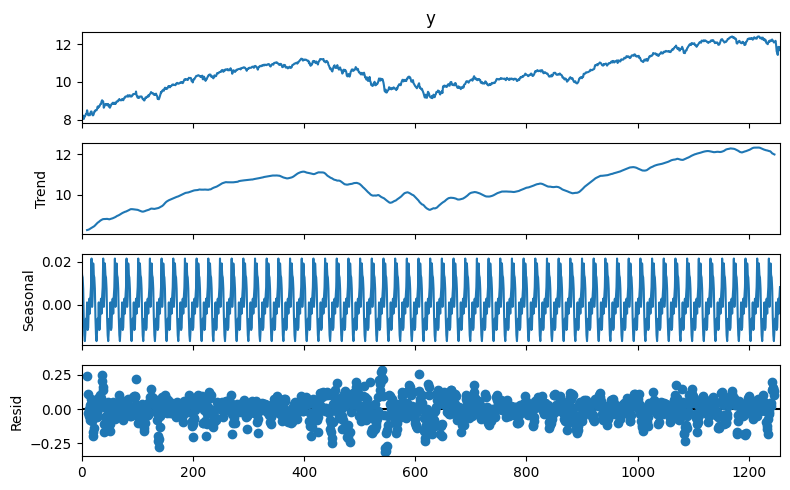

In [ ]:
plt.rcParams['figure.figsize']=(8,5)
m = seasonal_decompose(MUTUAL["y"], model = "Multiplicative", period=21).plot()
plt.show()
plt.close()

In [ ]:
augmented_dickey_fuller_test(MUTUAL["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                   -2.133408
p-value                           0.231295
No Lags Used                      0.000000
Number of observations used    1256.000000
Critical Value (1%)              -3.435567
Critical Value (5%)              -2.863844
Critical Value (10%)             -2.567997
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [ ]:
#---------------------
# RGA
#--------------------

In [ ]:
RGA_ticker = yf.Ticker("RGA")
RGA_history = RGA_ticker.history(period="5y")
RGA_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-15 00:00:00-04:00,91.258774,91.633259,87.050259,87.184006,714600,0.0,0.0
2020-04-16 00:00:00-04:00,86.996743,88.075619,83.617449,85.587959,559900,0.0,0.0
2020-04-17 00:00:00-04:00,90.099638,91.267676,87.817049,89.074257,643900,0.0,0.0
2020-04-20 00:00:00-04:00,86.426116,88.441211,85.204574,87.585243,785100,0.0,0.0
2020-04-21 00:00:00-04:00,84.580407,87.299894,83.207290,85.810860,1007400,0.0,0.0
2020-04-22 00:00:00-04:00,87.727882,88.958335,86.149693,88.191536,669700,0.0,0.0
2020-04-23 00:00:00-04:00,89.448745,90.465208,86.845175,87.032417,628400,0.0,0.0
2020-04-24 00:00:00-04:00,88.316378,90.723788,86.809514,90.313637,532500,0.0,0.0
2020-04-27 00:00:00-04:00,91.205265,94.557811,91.205265,93.960411,419400,0.0,0.0


In [ ]:
RGA = RGA_history.copy()

# Reset the index
RGA.reset_index(inplace=True)

# Ensure Date is a datetime object and format it
RGA['Date'] = pd.to_datetime(RGA['Date'])

# Select the necessary columns
RGA = RGA[['Date', 'Close']]

# Rename the 'Date' column to 'ds'
RGA = RGA.rename(columns={'Date': 'ds','Close':'y'})

RGA["unique_id"] = "1"
RGA.columns=["ds", "y", "unique_id"]

# Now df should have the index reset, Date formatted, and renamed to 'ds'
RGA.head()

,ds,y,unique_id
0,2020-04-15 00:00:00-04:00,87.184006,1
1,2020-04-16 00:00:00-04:00,85.587959,1
2,2020-04-17 00:00:00-04:00,89.074257,1
3,2020-04-20 00:00:00-04:00,87.585243,1
4,2020-04-21 00:00:00-04:00,85.810860,1


In [ ]:
RGA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   ds         1257 non-null   datetime64[ns, America/New_York]
 1   y          1257 non-null   float64                         
 2   unique_id  1257 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(1), object(1)
memory usage: 29.6+ KB


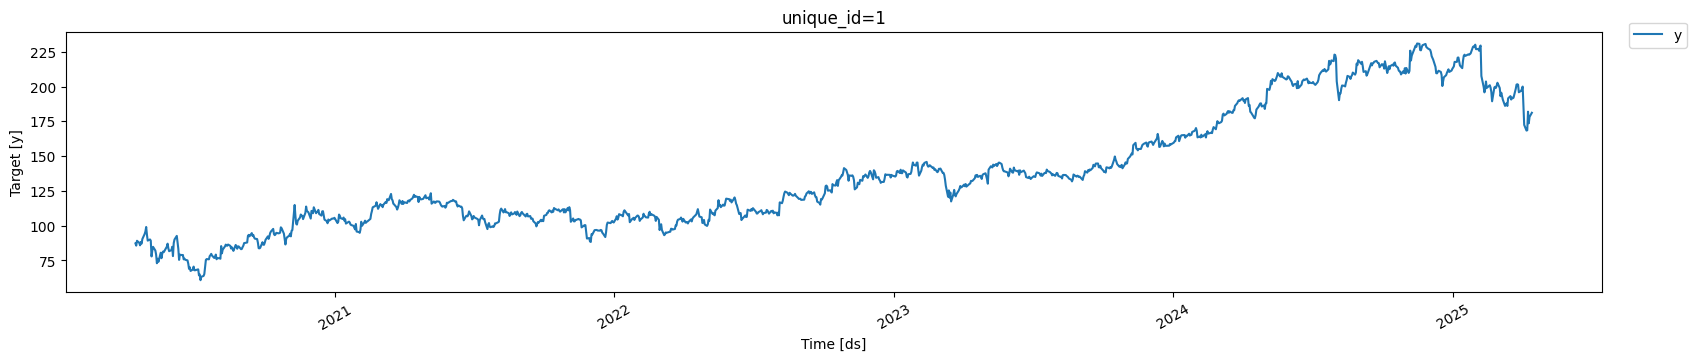

In [ ]:
fig = plot_series(RGA, palette='tab10')
fig

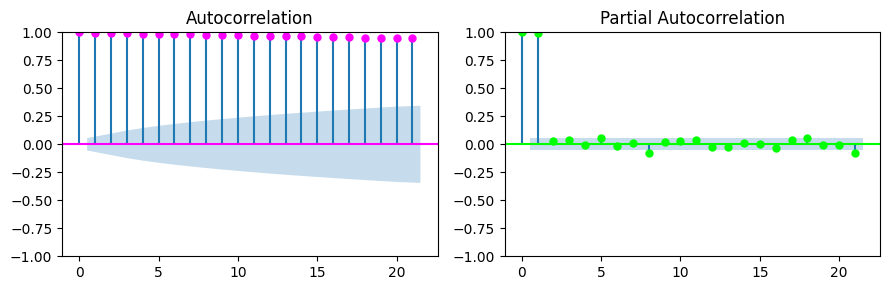

In [ ]:
plot_autocorrelation(RGA)

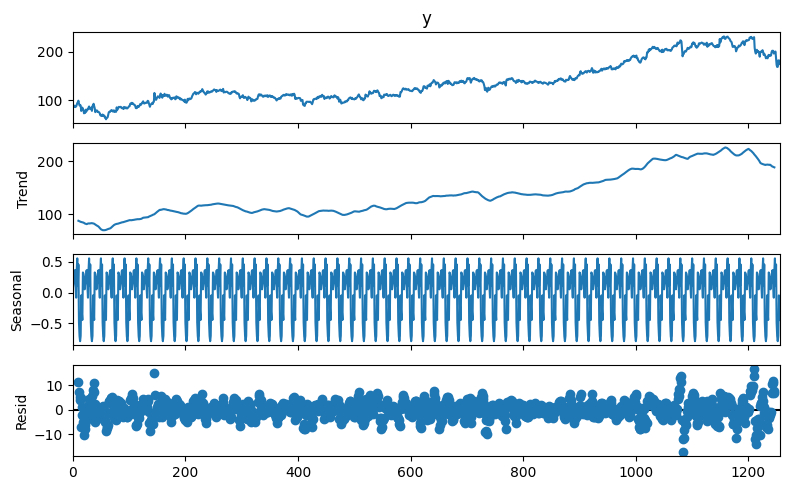

In [ ]:
plt.rcParams['figure.figsize']=(8,5)
m = seasonal_decompose(RGA["y"], model = "Multiplicative", period=21).plot()
plt.show()
plt.close()

In [ ]:
augmented_dickey_fuller_test(RGA["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                   -0.903239
p-value                           0.786904
No Lags Used                      9.000000
Number of observations used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary
